In [2]:
import requests
from bs4 import BeautifulSoup  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [3]:
website_url = 'https://countrymusichalloffame.org/hall-of-fame/members/'
response = requests.get(website_url)

response.status_code

200

In [4]:
print(type(response))
response.content

<class 'requests.models.Response'>


b'<!DOCTYPE html>\n<html lang="en-US">\n<head>\t\n<!-- Google Tag Manager -->\n\n<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({\'gtm.start\':\n\nnew Date().getTime(),event:\'gtm.js\'});var f=d.getElementsByTagName(s)[0],\n\nj=d.createElement(s),dl=l!=\'dataLayer\'?\'&l=\'+l:\'\';j.async=true;j.src=\n\n\'https://www.googletagmanager.com/gtm.js?id=\'+i+dl;f.parentNode.insertBefore(j,f);\n\n})(window,document,\'script\',\'dataLayer\',\'GTM-TVMMMDC\');</script>\n\n<!-- End Google Tag Manager -->\n<meta charset="UTF-8" />\n<meta name=\'viewport\' content=\'width=device-width, initial-scale=1.0\' />\n<meta http-equiv=\'X-UA-Compatible\' content=\'IE=edge\' /><script type="text/javascript">(window.NREUM||(NREUM={})).loader_config={licenseKey:"NRJS-6b1864f7928149029ec",applicationID:"624285542"};window.NREUM||(NREUM={}),__nr_require=function(e,t,n){function r(n){if(!t[n]){var i=t[n]={exports:{}};e[n][0].call(i.exports,function(t){var i=e[n][1][t];return r(i||t)},i,i.exports)}return t[n

In [5]:
HOF = BeautifulSoup(response.content, 'lxml')
print(HOF.title)

<title>Hall of Fame Members | Country Music Hall of Fame</title>


In [6]:
print(HOF)

<!DOCTYPE html>
<html lang="en-US">
<head>
<!-- Google Tag Manager -->
<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':

new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],

j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=

'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);

})(window,document,'script','dataLayer','GTM-TVMMMDC');</script>
<!-- End Google Tag Manager -->
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/><script type="text/javascript">(window.NREUM||(NREUM={})).loader_config={licenseKey:"NRJS-6b1864f7928149029ec",applicationID:"624285542"};window.NREUM||(NREUM={}),__nr_require=function(e,t,n){function r(n){if(!t[n]){var i=t[n]={exports:{}};e[n][0].call(i.exports,function(t){var i=e[n][1][t];return r(i||t)},i,i.exports)}return t[n].exports}if("function"==typeof __nr_require)return _

In [7]:
names = HOF.find_all('div', attrs = {'class': 'vertical-card_content--title'})
print(names)

[<div class="vertical-card_content--title">
<h3>Roy Acuff</h3>
</div>, <div class="vertical-card_content--title">
<h3>Alabama</h3>
</div>, <div class="vertical-card_content--title">
<h3>Bill Anderson</h3>
</div>, <div class="vertical-card_content--title">
<h3>Eddy Arnold</h3>
</div>, <div class="vertical-card_content--title">
<h3>Chet Atkins</h3>
</div>, <div class="vertical-card_content--title">
<h3>Gene Autry</h3>
</div>, <div class="vertical-card_content--title">
<h3>DeFord Bailey</h3>
</div>, <div class="vertical-card_content--title">
<h3>Bobby Bare</h3>
</div>, <div class="vertical-card_content--title">
<h3>Johnny Bond</h3>
</div>]


In [8]:
years = HOF.find_all('div', attrs = {'class': 'vertical-card_content--copy'})
print(years)

[<div class="vertical-card_content--copy">
<p>
                    Inducted 1962                  </p>
</div>, <div class="vertical-card_content--copy">
<p>
                    Inducted 2005                  </p>
</div>, <div class="vertical-card_content--copy">
<p>
                    Inducted 2001                  </p>
</div>, <div class="vertical-card_content--copy">
<p>
                    Inducted 1966                  </p>
</div>, <div class="vertical-card_content--copy">
<p>
                    Inducted 1973                  </p>
</div>, <div class="vertical-card_content--copy">
<p>
                    Inducted 1969                  </p>
</div>, <div class="vertical-card_content--copy">
<p>
                    Inducted 2005                  </p>
</div>, <div class="vertical-card_content--copy">
<p>
                    Inducted 2013                  </p>
</div>, <div class="vertical-card_content--copy">
<p>
                    Inducted 1999                  </p>
</div>]


In [9]:
artists = []
for i in range(len(names)):
    name = names[i].get_text().replace("\n", "").strip()
    artists.append(name)
print(artists)



['Roy Acuff', 'Alabama', 'Bill Anderson', 'Eddy Arnold', 'Chet Atkins', 'Gene Autry', 'DeFord Bailey', 'Bobby Bare', 'Johnny Bond']


In [10]:
inducted = []
for i in range(len(years)):
    year = years[i].get_text().replace("\n", "").strip()
    inducted.append(year)
print(inducted)


['Inducted 1962', 'Inducted 2005', 'Inducted 2001', 'Inducted 1966', 'Inducted 1973', 'Inducted 1969', 'Inducted 2005', 'Inducted 2013', 'Inducted 1999']


In [11]:
both = pd.DataFrame([artists,inducted]).T
both.columns=['Name','Inducted']
both['Inducted'] = both['Inducted'].str.strip('Inducted')
both

,Name,Inducted
0,Roy Acuff,1962
1,Alabama,2005
2,Bill Anderson,2001
3,Eddy Arnold,1966
4,Chet Atkins,1973
5,Gene Autry,1969
6,DeFord Bailey,2005
7,Bobby Bare,2013
8,Johnny Bond,1999


In [12]:



url = 'https://countrymusichalloffame.org/hall-of-fame/members/page/'
final_df = pd.DataFrame()

for page in range(1,17):


    r = requests.get(url + str(page))

    soup = BeautifulSoup(r.content, "lxml")

    result_list=[]
    for artist in soup.find_all("h3"):
        #print(link.text)
        result_list.append(artist.text)
        
    x = [element.text for element in soup.find_all("div", "vertical-card_content--copy")]
    year = []
    for element in x:
        year.append(element.strip())
        
    b=[]
    for i in year:
        b+=i.split(" ")
       
    b=b[1::2]

    dict={'Name':result_list,'Inducted':b}
    df= pd.DataFrame(dict)
    final_df = final_df.append(df)
    
    
# url_temp = 'https://countrymusichalloffame.org/hall-of-fame/members/page/{}'
# artists = []
# inducted = []
# for page in range(1,17):
#     w_url = url_temp.format(page)
#     response = requests.get(w_url)
#     page_html = BeautifulSoup(response.content, 'lxml')
#     n = names.find_all('div', attrs = {'class': 'vertical-card_content--title'})
#     y = years.find_all('div', attrs = {'class': 'vertical-card_content--copy'})
#     for i in range(len(names)):
#         name = n[i].get_text().replace("\n", "")
#         artists.append(name)
#     for i in range(len(years)):
#         ind = y[i].get_text().replace("\n", "").strip()
#         year = re.sub("[^0-9]", "", ind)
#         inducted.append(year)
        
# print(artists)
# print(inducted)
#THIS CODE REQUIRES IMPORT RE AT THE VERY BEGINNING


In [13]:
#find a total of all artist in the HOF 
final_df['Inducted'] = final_df['Inducted'].astype('int')
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 0 to 4
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      140 non-null    object
 1   Inducted  140 non-null    int32 
dtypes: int32(1), object(1)
memory usage: 2.7+ KB


In [14]:
len(final_df.index)

140

(array([16., 15., 20., 21., 36., 32.]),
 array([1960, 1970, 1980, 1990, 2000, 2010, 2020]),
 <BarContainer object of 6 artists>)

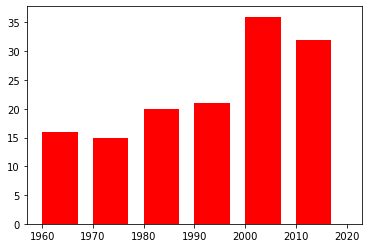

In [15]:
plt.hist(final_df.Inducted, bins = [1960, 1970, 1980, 1990, 2000, 2010, 2020],color='red', width=7)

In [16]:
final_df['Name']
list_of_names = final_df['Name'].to_list()
print(list_of_names)

['Roy Acuff', 'Alabama', 'Bill Anderson', 'Eddy Arnold', 'Chet Atkins', 'Gene Autry', 'DeFord Bailey', 'Bobby Bare', 'Johnny Bond', 'Bobby Braddock', 'Harold Bradley', 'Jerry Bradley', 'Owen Bradley', 'Rod Brasfield', 'Garth Brooks', 'Brooks & Dunn', 'Jim Ed Brown', 'Jim Ed Brown and the Browns', 'Boudleaux and Felice Bryant', 'Glen Campbell', 'Bill Carlisle', 'Carter Family', 'Johnny Cash', 'Roy Clark', 'Cowboy Jack Clement', 'Patsy Cline', 'Hank Cochran', 'Paul Cohen', 'Floyd Cramer', 'Vernon Dalhart', 'Charlie Daniels', 'Jimmie Davis', 'Jimmy Dean', 'Delmore Brothers', 'Jim Denny', 'Little Jimmy Dickens', 'Ralph Emery', 'The Everly Brothers', 'Flatt And Scruggs', 'Jim Foglesong', 'Red Foley', 'Tennessee Ernie Ford', 'Fred Foster', 'Joseph Frank', 'Lefty Frizzell', 'Connie B. Gay', 'Don Gibson', 'Vince Gill', 'Johnny Gimble', 'Merle Haggard', 'Tom T. Hall', 'Emmylou Harris', 'George D. Hay', 'Homer and Jethro', 'Roy Horton', 'Harlan Howard', 'Ferlin Husky', 'Alan Jackson', 'Sonny Jam

In [17]:

clean_names = []
for artist in list_of_names:
    url_name = artist.replace('"', "").replace(".", "").replace(" ", "-").lower()
    clean_names.append(url_name)


LON = []

for name in clean_names:
    new_name = name.replace("\u200bjerry-reed", "\%E2\%80\%8Bjerry-reed")
    new_name2 = new_name.replace("hargus-“pig”-robbins", "hargus-pig-robbins")
    new_name3 = new_name2.replace("ernest-v-“pop”-stoneman", "ernest-v-pop-stoneman")
    new_name4 = new_name3.replace("e-w-“bud”-wendell", "e-w-bud-wendell")
    LON.append(new_name4)

print(LON)

['roy-acuff', 'alabama', 'bill-anderson', 'eddy-arnold', 'chet-atkins', 'gene-autry', 'deford-bailey', 'bobby-bare', 'johnny-bond', 'bobby-braddock', 'harold-bradley', 'jerry-bradley', 'owen-bradley', 'rod-brasfield', 'garth-brooks', 'brooks-&-dunn', 'jim-ed-brown', 'jim-ed-brown-and-the-browns', 'boudleaux-and-felice-bryant', 'glen-campbell', 'bill-carlisle', 'carter-family', 'johnny-cash', 'roy-clark', 'cowboy-jack-clement', 'patsy-cline', 'hank-cochran', 'paul-cohen', 'floyd-cramer', 'vernon-dalhart', 'charlie-daniels', 'jimmie-davis', 'jimmy-dean', 'delmore-brothers', 'jim-denny', 'little-jimmy-dickens', 'ralph-emery', 'the-everly-brothers', 'flatt-and-scruggs', 'jim-foglesong', 'red-foley', 'tennessee-ernie-ford', 'fred-foster', 'joseph-frank', 'lefty-frizzell', 'connie-b-gay', 'don-gibson', 'vince-gill', 'johnny-gimble', 'merle-haggard', 'tom-t-hall', 'emmylou-harris', 'george-d-hay', 'homer-and-jethro', 'roy-horton', 'harlan-howard', 'ferlin-husky', 'alan-jackson', 'sonny-james'

In [18]:
#testing individual returns for birth,death, and birthplace info.
w_url = 'https://countrymusichalloffame.org/artist/roy-acuff/'
response = requests.get(w_url)
page_html = BeautifulSoup(response.content, 'lxml')
deets = page_html.find_all('p')
deets[5].get_text()

'Birth: September 15, 1903 - Death: November 23, 1992  Birthplace: Maynardville, Tennessee '

In [19]:
artist_pages = []
year_pages_dirty = []
web_address_pages = []



for i in range(2,17):      # Number of pages plus one, starting on page 2 cause we already did the first page
    url = 'https://countrymusichalloffame.org/hall-of-fame/members/page/'
    response = requests.get(url + str(i))
    soup = BeautifulSoup(response.content, 'lxml')
    print(url + str(i)) # Watching it print out the url to verify it's working
    
    a = soup.find_all("div", "vertical-card_content--title") # Containter for artists
    c = soup.find_all("div", "vertical-card_content--copy") # Container for year
    d = soup.find_all('div', class_='vertical-card_content') # Container for web address
     
    for element in a: # Going through each of the containers 'a' and adding name to my artist lists
        name = element.h3.text
        artist_pages.append(name)
    
    for element in c: # Going through each of the containers 'c' and adding year to my year lists
        year = element.p.text.strip()
        year_pages_dirty.append(year)

    for element in d: # Going through each of the containers 'd' and adding addresses to my web address lists
        link = element.a['href']
        web_address_pages.append(link)

https://countrymusichalloffame.org/hall-of-fame/members/page/2
https://countrymusichalloffame.org/hall-of-fame/members/page/3
https://countrymusichalloffame.org/hall-of-fame/members/page/4
https://countrymusichalloffame.org/hall-of-fame/members/page/5
https://countrymusichalloffame.org/hall-of-fame/members/page/6
https://countrymusichalloffame.org/hall-of-fame/members/page/7
https://countrymusichalloffame.org/hall-of-fame/members/page/8
https://countrymusichalloffame.org/hall-of-fame/members/page/9
https://countrymusichalloffame.org/hall-of-fame/members/page/10
https://countrymusichalloffame.org/hall-of-fame/members/page/11
https://countrymusichalloffame.org/hall-of-fame/members/page/12
https://countrymusichalloffame.org/hall-of-fame/members/page/13
https://countrymusichalloffame.org/hall-of-fame/members/page/14
https://countrymusichalloffame.org/hall-of-fame/members/page/15
https://countrymusichalloffame.org/hall-of-fame/members/page/16


In [20]:
#teng is a lifesaver :(
year_pages = []

for x in year_pages_dirty: # Recycling code from before to clean the years
    year_pages.append(x.replace('Inducted ',''))

In [21]:
hof_dic = {'Inducted': year_pages, 'Name': artist_pages, 'Web Address': web_address_pages}
hof_df = pd.DataFrame(hof_dic)
hof_df

,Inducted,Name,Web Address
0,2011,Bobby Braddock,https://countrymusichalloffame.org/artist/bobb...
1,2006,Harold Bradley,https://countrymusichalloffame.org/artist/haro...
2,2019,Jerry Bradley,https://countrymusichalloffame.org/artist/jerr...
3,1974,Owen Bradley,https://countrymusichalloffame.org/artist/owen...
4,1987,Rod Brasfield,https://countrymusichalloffame.org/artist/rod-...
...,...,...,...
126,1961,Hank Williams,https://countrymusichalloffame.org/artist/hank...
127,1968,Bob Wills,https://countrymusichalloffame.org/artist/bob-...
128,2014,Mac Wiseman,https://countrymusichalloffame.org/artist/mac-...
129,1998,Tammy Wynette,https://countrymusichalloffame.org/artist/tamm...


In [22]:
birthday = []
birthplace = []


for i in hof_df['Web Address']:      # Going through each artist web address
#     print(i) # Verify it's going through the pages
    url = i
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'lxml')
    
    t = soup.find(string=re.compile("Birth|Death")) # Container using regex to find "Birth or Death" and grabbing that string || From Josh
    birthday.append(t) # Going through each of the containers 'd' and adding addresses to my web address lists
#     print(birthday) # Verifying that the birthdays and deaths are being added
    r = soup.find(string=re.compile("Birthplace"))
    birthplace.append(r)

In [23]:
birthday

['Birth: August 5, 1940 ',
 'Birth: January 2, 1926 ',
 'Birth: January 30, 1940 ',
 'Birth: October 21, 1915 - Death: January 7, 1998 ',
 'Birth: August 22, 1910 - Death: September 12, 1958 ',
 'Birth: February 7, 1962 ',
 None,
 'Birth: April 1, 1934 - Death: June 11, 2015 ',
 None,
 None,
 'Birth: April 22, 1936 - Death: August 8, 2017 ',
 'Birth: December 19, 1908 - Death: March 17, 2003 ',
 None,
 'Birth: February 26, 1932 - Death: September 12, 2003 ',
 'Birth: April 15, 1933 - Death: November 15, 2018 ',
 'Birth: April 5, 1931 - Death: August 8, 2013 ',
 'Birth: September 8, 1932 - Death: March 5, 1963 ',
 'Birth: August 2, 1935 - Death: July 15, 2010 ',
 'Birth: November 10, 1908 - Death: April 1, 1970 ',
 'Birth: October 27, 1933 - Death: December 31, 1997 ',
 'Birth: April 6, 1883 - Death: September 14, 1948 ',
 'Birth: October 28, 1936 - Death: July 6, 2020 ',
 'Birth: September 11, 1899 - Death: November 5, 2000 ',
 'Birth: August 10, 1928 - Death: June 13, 2010 ',
 None,
 

In [24]:
birthplace

[' Birthplace: Lakeland, Florida ',
 ' Birthplace: Nashville, Tennessee ',
 ' Birthplace: Nashville, TN ',
 ' Birthplace: Westmoreland, Tennessee ',
 ' Birthplace: Smithville, Mississippi ',
 ' Birthplace: Tulsa, Oklahoma ',
 None,
 ' Birthplace: Sparkman, Arkansas ',
 None,
 None,
 ' Birthplace: Delight, Arkansas ',
 ' Birthplace: Wakefield, Kentucky ',
 None,
 ' Birthplace: Kingsland, Arkansas ',
 ' Birthplace: Meherrin, Virginia ',
 ' Birthplace: Whitehaven, Tennessee ',
 ' Birthplace: Winchester, Virginia ',
 ' Birthplace: Isola, Mississippi ',
 ' Birthplace: Chicago, Illinois ',
 ' Birthplace: Shreveport, Louisiana ',
 ' Birthplace: Jefferson, Texas ',
 ' Birthplace: Wilmington, North Carolina ',
 ' Birthplace: Beech Springs (near Quitman), Louisiana ',
 ' Birthplace: Olton, Texas ',
 None,
 ' Birthplace: Buffalo Valley, Tennessee ',
 ' Birthplace: Bolt, West Virginia ',
 ' Birthplace: McEwen, Tennessee ',
 None,
 None,
 ' Birthplace: Lundale, West Virginia ',
 ' Birthplace: Blue 

In [25]:

bd_dic = {'Birthday - Death': birthday, 'Birthplace': birthplace} 
bd_df = pd.DataFrame(bd_dic)
bd_df

,Birthday - Death,Birthplace
0,"Birth: August 5, 1940","Birthplace: Lakeland, Florida"
1,"Birth: January 2, 1926","Birthplace: Nashville, Tennessee"
2,"Birth: January 30, 1940","Birthplace: Nashville, TN"
3,"Birth: October 21, 1915 - Death: January 7, 1998","Birthplace: Westmoreland, Tennessee"
4,"Birth: August 22, 1910 - Death: September 12, ...","Birthplace: Smithville, Mississippi"
...,...,...
126,"Birth: September 17, 1923 - Death: January 1, ...","Birthplace: Mount Olive, Alabama"
127,"Birth: March 6, 1905 - Death: May 13, 1975","Birthplace: Kosse, Texas"
128,"Birth: May 23, 1925 - Death: February 24, 2019","Birthplace: Crimora, Virginia"
129,"Birth: May 5, 1942 - Death: April 6, 1998","Birthplace: Itawamba County, Mississippi"


In [26]:
new = bd_df["Birthday - Death"].str.split(" - ", n = 1, expand = True) # Splitting the Birthday/Death into 2 columns using " - " as the delimiter
new

,0,1
0,"Birth: August 5, 1940",None
1,"Birth: January 2, 1926",None
2,"Birth: January 30, 1940",None
3,"Birth: October 21, 1915","Death: January 7, 1998"
4,"Birth: August 22, 1910","Death: September 12, 1958"
...,...,...
126,"Birth: September 17, 1923","Death: January 1, 1953"
127,"Birth: March 6, 1905","Death: May 13, 1975"
128,"Birth: May 23, 1925","Death: February 24, 2019"
129,"Birth: May 5, 1942","Death: April 6, 1998"


In [27]:

new.columns = ['Birthday', 'Death'] # Rename columns
new

,Birthday,Death
0,"Birth: August 5, 1940",None
1,"Birth: January 2, 1926",None
2,"Birth: January 30, 1940",None
3,"Birth: October 21, 1915","Death: January 7, 1998"
4,"Birth: August 22, 1910","Death: September 12, 1958"
...,...,...
126,"Birth: September 17, 1923","Death: January 1, 1953"
127,"Birth: March 6, 1905","Death: May 13, 1975"
128,"Birth: May 23, 1925","Death: February 24, 2019"
129,"Birth: May 5, 1942","Death: April 6, 1998"


In [28]:
# Cleaning, replacing some words
new_b = new.Birthday.str.replace('Birth: ', '') 
new_d = new.Death.str.replace('Death: ','')
new_p = bd_df.Birthplace.str.replace('Birthplace: ', '')

In [29]:

v = {'Birthday': new_b, 'Death': new_d, 'Birthplace': new_p}
bdp_df = pd.DataFrame(v)
bdp_df # New df

,Birthday,Death,Birthplace
0,"August 5, 1940",None,"Lakeland, Florida"
1,"January 2, 1926",None,"Nashville, Tennessee"
2,"January 30, 1940",None,"Nashville, TN"
3,"October 21, 1915","January 7, 1998","Westmoreland, Tennessee"
4,"August 22, 1910","September 12, 1958","Smithville, Mississippi"
...,...,...,...
126,"September 17, 1923","January 1, 1953","Mount Olive, Alabama"
127,"March 6, 1905","May 13, 1975","Kosse, Texas"
128,"May 23, 1925","February 24, 2019","Crimora, Virginia"
129,"May 5, 1942","April 6, 1998","Itawamba County, Mississippi"


In [30]:

final_hof = pd.concat([hof_df, bdp_df], axis=1, join='inner') # Adding df together
final_hof

,Inducted,Name,Web Address,Birthday,Death,Birthplace
0,2011,Bobby Braddock,https://countrymusichalloffame.org/artist/bobb...,"August 5, 1940",None,"Lakeland, Florida"
1,2006,Harold Bradley,https://countrymusichalloffame.org/artist/haro...,"January 2, 1926",None,"Nashville, Tennessee"
2,2019,Jerry Bradley,https://countrymusichalloffame.org/artist/jerr...,"January 30, 1940",None,"Nashville, TN"
3,1974,Owen Bradley,https://countrymusichalloffame.org/artist/owen...,"October 21, 1915","January 7, 1998","Westmoreland, Tennessee"
4,1987,Rod Brasfield,https://countrymusichalloffame.org/artist/rod-...,"August 22, 1910","September 12, 1958","Smithville, Mississippi"
...,...,...,...,...,...,...
126,1961,Hank Williams,https://countrymusichalloffame.org/artist/hank...,"September 17, 1923","January 1, 1953","Mount Olive, Alabama"
127,1968,Bob Wills,https://countrymusichalloffame.org/artist/bob-...,"March 6, 1905","May 13, 1975","Kosse, Texas"
128,2014,Mac Wiseman,https://countrymusichalloffame.org/artist/mac-...,"May 23, 1925","February 24, 2019","Crimora, Virginia"
129,1998,Tammy Wynette,https://countrymusichalloffame.org/artist/tamm...,"May 5, 1942","April 6, 1998","Itawamba County, Mississippi"


In [ ]:
final_hof['Birthplace']
city_state = final_hof["Birthplace"].str.split(", ", n = 1, expand = True) # Splitting the City/State into 2 columns using " , " as the delimiter
city_state.columns = ["City", "State"]
geo_clean = city_state.State.str.replace('TN', 'Tennessee')

In [71]:
geo_c = {"City" : city_state['City'], 'State': geo_clean}
CS_df = pd.DataFrame(geo_c)
CS_df

,City,State
0,Lakeland,Florida
1,Nashville,Tennessee
2,Nashville,Tennessee
3,Westmoreland,Tennessee
4,Smithville,Mississippi
...,...,...
126,Mount Olive,Alabama
127,Kosse,Texas
128,Crimora,Virginia
129,Itawamba County,Mississippi


In [72]:
totes = CS_df.groupby(by='State').agg('count')
totes

,City
State,
Alabama,6
Arizona,1
Arkansas,4
California,2
D.C.,1
England,2
Florida,2
Georgia,4
Illinois,2
